In [1]:
%matplotlib inline

3. Test with DeepLabV3 Pre-trained Models
======================================

This is a quick demo of using GluonCV DeepLabV3 model on ADE20K dataset.
Please follow the `installation guide <../index.html>`_ to install MXNet and GluonCV if not yet.


In [2]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



In [7]:
'''
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001755.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)
'''
filename = 'data/2/nju-cs.jpg'

load the image



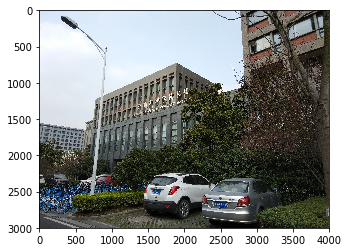

In [8]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [9]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [13]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

make prediction using single scale



In [14]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

Add color pallete for visualization



In [15]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('data/4/output-nju-cs.png')

show the predicted mask



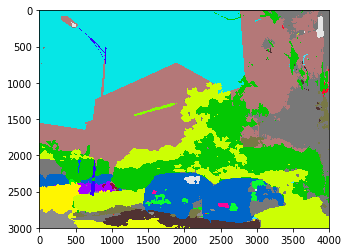

In [16]:
mmask = mpimg.imread('data/4/output-nju-cs.png')
plt.imshow(mmask)
plt.show()

# More Examples

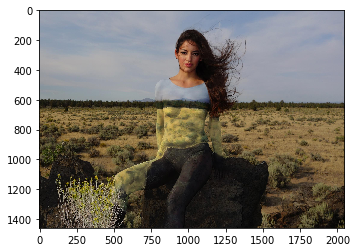

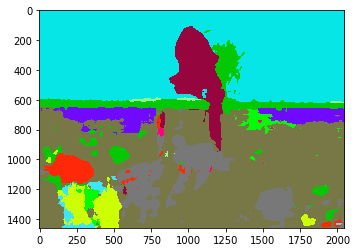

In [17]:
filename = 'data/2/1.jpg'
img = image.imread(filename)

plt.imshow(img.asnumpy())
plt.show()
img = test_transform(img, ctx)
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

mask = get_color_pallete(predict, 'ade20k')
mask.save('data/4/output1.png')
mmask = mpimg.imread('data/4/output1.png')
plt.imshow(mmask)
plt.show()